# aGAL trajecotries evaluation

To be run after production is completed.


The notebook accounts for RMSD and RMSF computation of various elements (we focused on whole protein using Ca, ligand and glycans).


Data is stored in csv files in the /results/tables folder, for each call a plot is generated and stored at /results/single_plots; whereas it is possible to generate seprately, through this notebook, tables of plots with all the replicas for easier comparisons (stored at /results/combined_plots).

**NOTE** `rmsd` and `rmsf` functions compute the respective metric only once if the filename input is already present in the results/tables/ folder.

**NOTE** `rmsd` and `rmsf` functions can be run also using [evaluation.py](evaluation.py) Pyhton script, accordingly adjusted.

In [1]:
import pandas as pd 
import numpy as np
from moleculekit.molecule import Molecule

from rmsd import * 
from rmsf import *

## RMSD

### Whole protein - CA

In [ ]:
structure = ['apo', 'apo_N215S', 'apo_R301Q', 'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/production/structure.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/production/output.xtc'
        
        rmsd(f'{s}{r}_CA', topology, trajectory, refmol = topology, trajrmsdstr='protein and name CA',trajalnstr='protein',refalnstr='protein', refrmsdstr = 'protein and name CA', title = True)
        

Plot the replicas together:

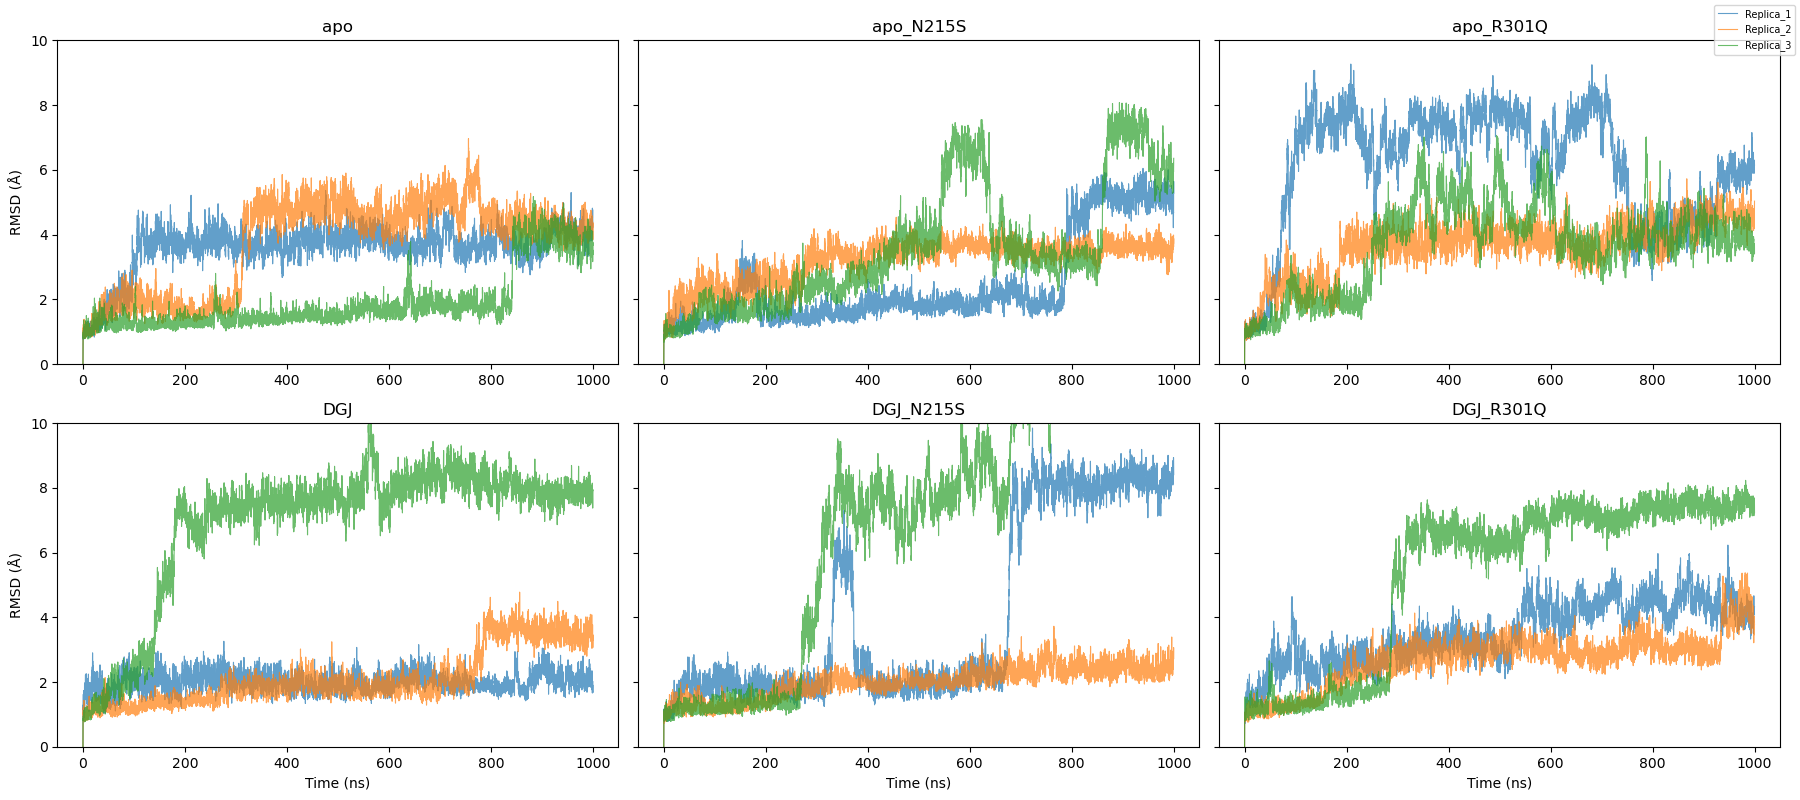

In [2]:
structures = ['apo', 'apo_N215S', 'apo_R301Q', 
              'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']

cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    '_1': colors[0],'_2': colors[1],'_3': colors[2]}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()  # easier to index

for i, s in enumerate(structures):
    ax = axes[i]
    for r in replicas:
        data = pd.read_csv(f'../results/tables/{s}{r}_CA_rmsd.csv')
        if i == 0:
            ax.plot(data['time'], data['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7, label=f"Replica{r}")
        else:
            ax.plot(data['time'], data['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7)

    ax.set_title(s)
    ax.set_ylim(0,10)
    if i < 3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel("Time (ns)")
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel("RMSD (Å)")

fig.legend(fontsize=7)

plt.tight_layout()
plt.savefig("../results/combined_plots/rmsd_CA_all.pdf", dpi=300)
_=plt.show()

### Monomers (chain A/B)

In [ ]:
structure = ['apo', 'apo_N215S', 'apo_R301Q', 'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/production/structure.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/production/output.xtc'
        rmsd(f'{s}{r}_CA_chain_A', topology, trajectory, refmol = topology, trajrmsdstr='protein and name CA and chain A', refrmsdstr = 'protein and name CA and chain A')
        rmsd(f'{s}{r}_CA_chain_B', topology, trajectory, refmol = topology, trajrmsdstr='protein and name CA and chain B', refrmsdstr = 'protein and name CA and chain B')

### Ligand in respect to ligand

In [ ]:
structure = ['DGJ', 'DGJ_N215S', 'DGJ_R301Q'] #apo doesn't have it obviously
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/production/structure.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/production/output.xtc'
        
        rmsd(f'{s}{r}_lig', topology, trajectory, refmol = topology, trajrmsdstr='resname DGJ',trajalnstr='protein and name CA',refalnstr='protein and name CA', refrmsdstr = 'resname DGJ', title = True)
        

FileNotFoundError: [Errno 2] No such file or directory: '../results/tables/DGJ_1_lig_rmsd.csv'

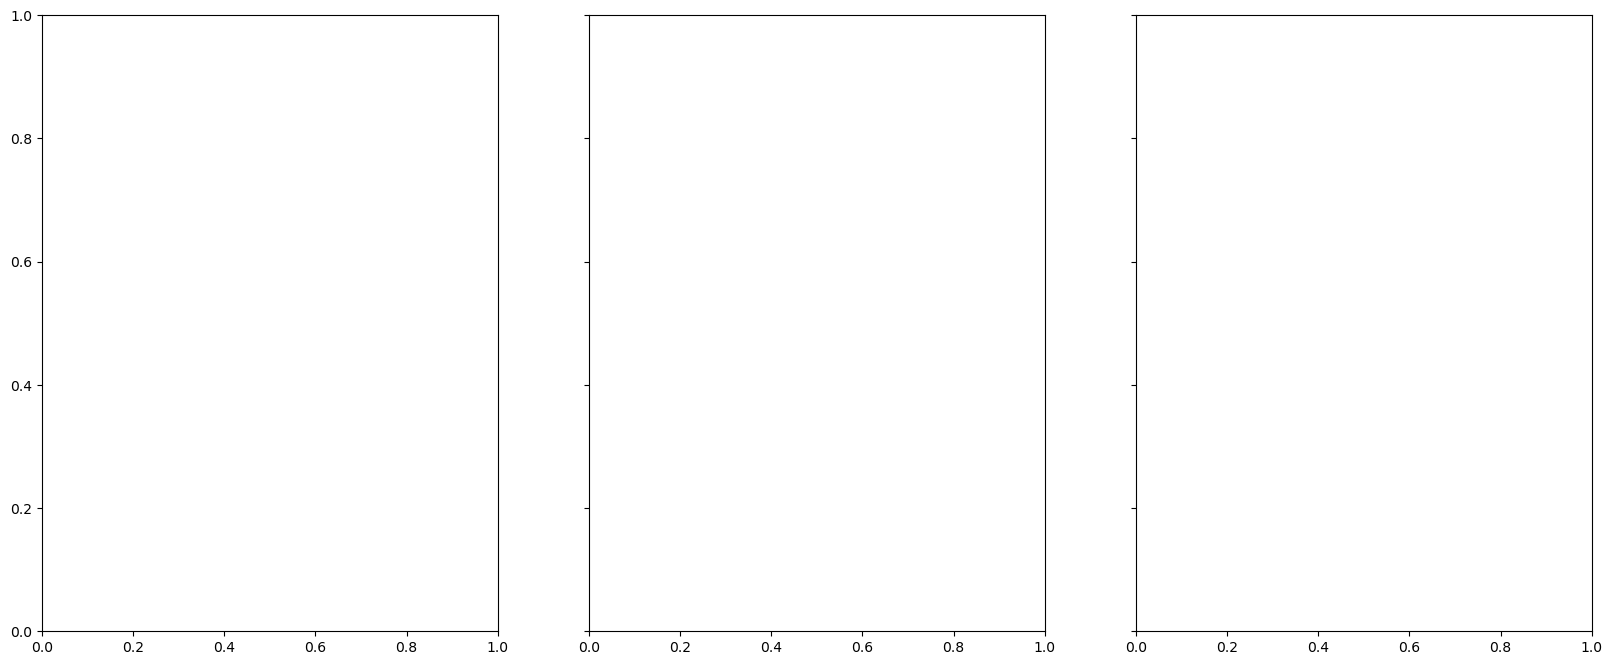

In [3]:
#plot replicas together
structures = ['DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']

cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    '_1': colors[0],'_2': colors[1],'_3': colors[2]}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8), sharey=True)
axes = axes.flatten()  # easier to index

for i, s in enumerate(structures):
    ax = axes[i]
    for r in replicas:
        data = pd.read_csv(f'../results/tables/{s}{r}_lig_rmsd.csv')
        if i == 0:
            ax.plot(data['time'], data['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7, label=f"Replica{r}")
        else:
            ax.plot(data['time'], data['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7)

    ax.set_title(s)
    #ax.set_ylim(0,10)
    ax.set_xlabel("Time (ns)")
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel("RMSD (Å)")

fig.legend(fontsize=7)

plt.tight_layout()
plt.savefig("../results/combined_plots/rmsd_lig_all.pdf", dpi=300)



### Glycans

In [ ]:
structure = ['apo', 'apo_N215S', 'apo_R301Q', 'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/production/structure.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/production/output.xtc'
        
        rmsd(f'{s}{r}_gly', topology, trajectory, refmol = topology, trajrmsdstr='resname BGLC or resname AMAN',trajalnstr='protein',refalnstr='protein', refrmsdstr = 'resname BGLC and resname AMAN', title = True)

FileNotFoundError: [Errno 2] No such file or directory: '../results/tables/apo_1_gly_rmsf.csv'

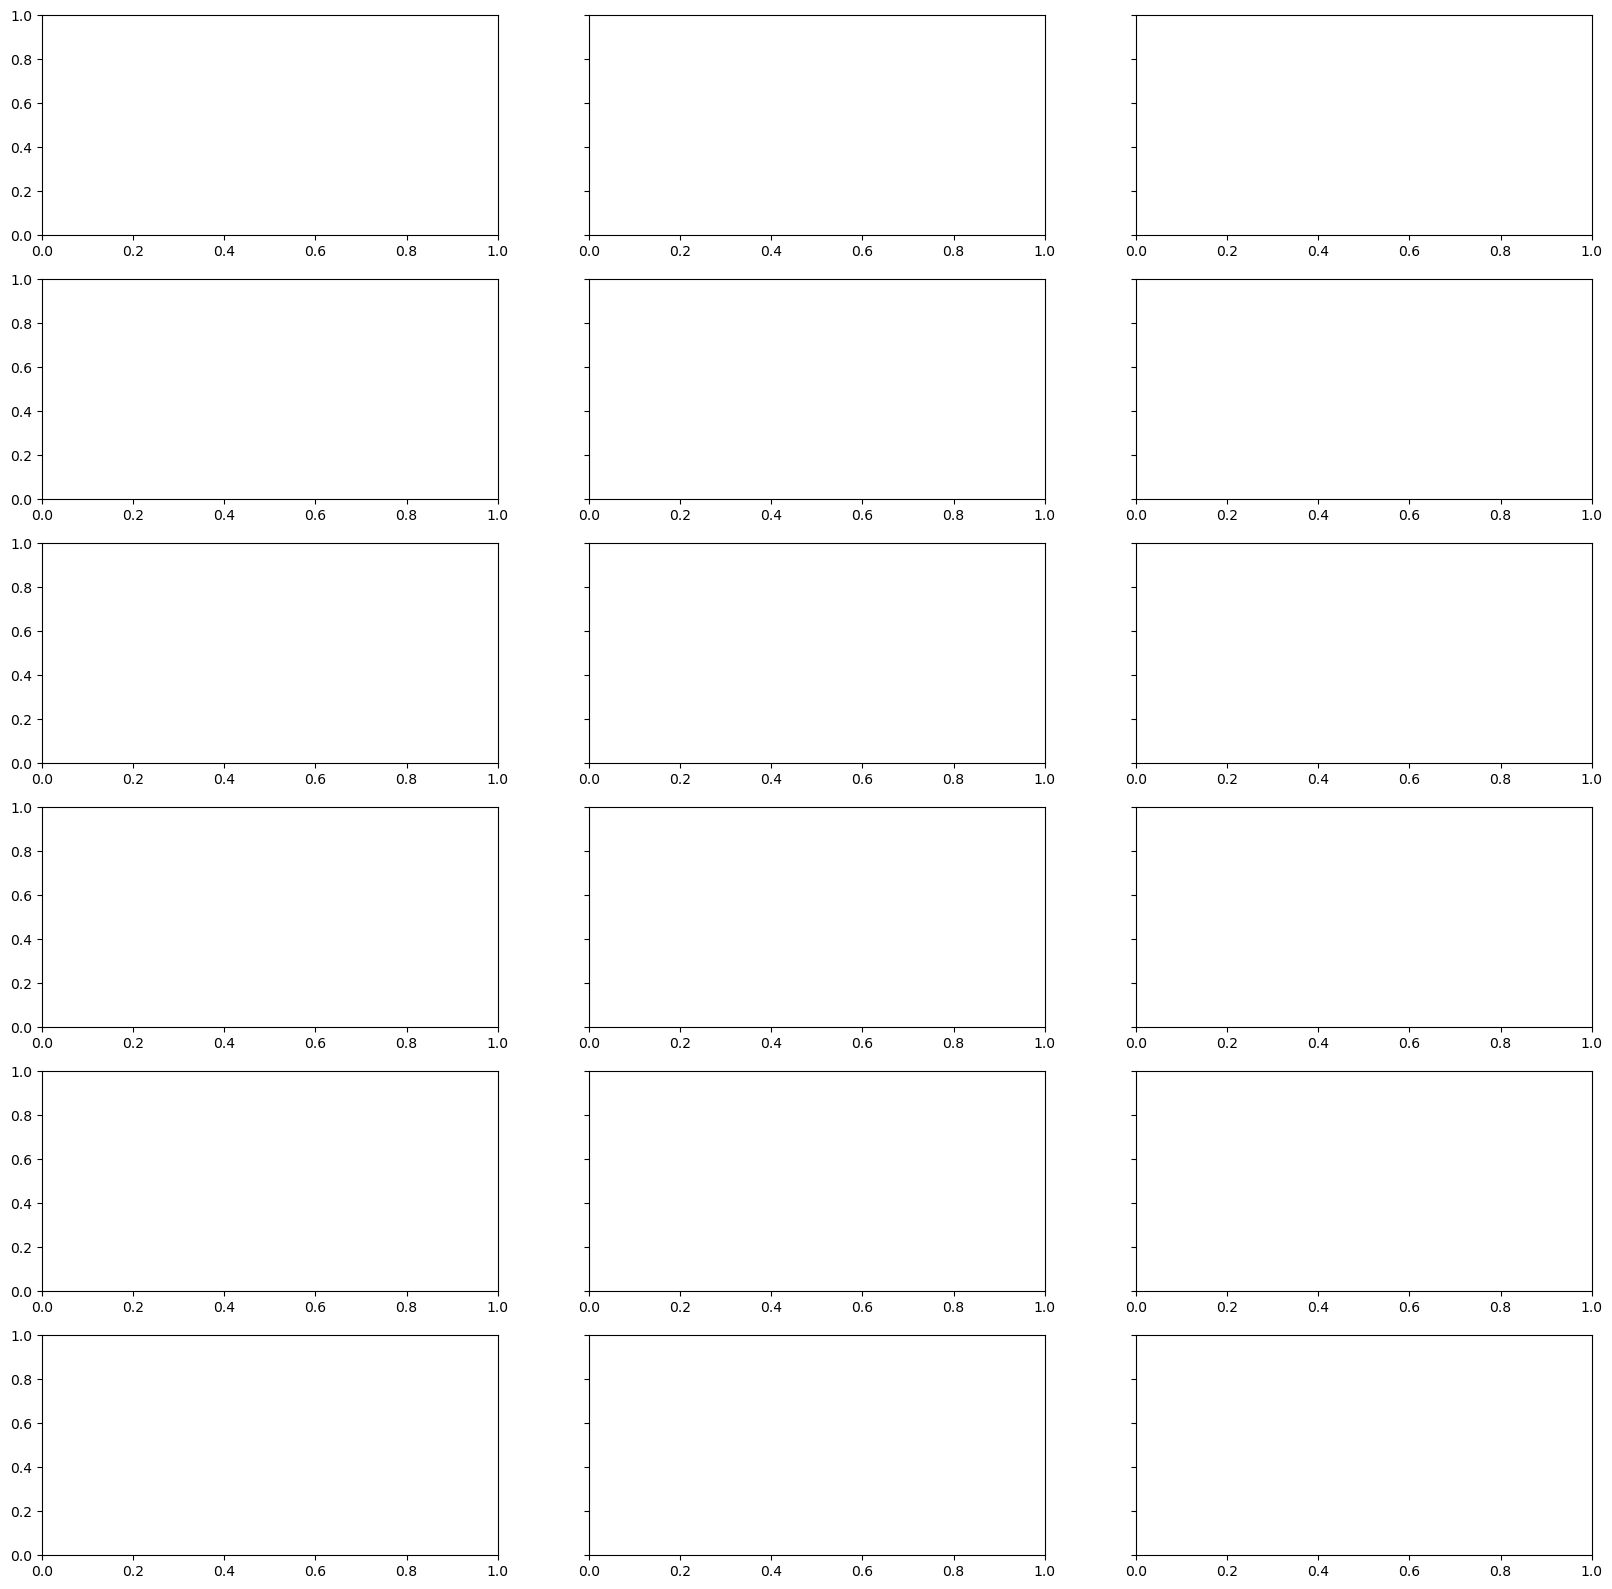

In [4]:
structures = ['apo', 'apo_N215S', 'apo_R301Q',
              'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']
chain_ids = ['C', 'D', 'E','F','G','H']

fig, axes = plt.subplots(len(structures), len(replicas), figsize=(20, 20), sharey=True)
axes = axes.flatten()
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    'C': colors[0], 'F': colors[1],
    'D': colors[2], 'G': colors[3],
    'E': colors[4], 'H': colors[5],}

for i, (s, r) in enumerate([(s,r) for s in structures for r in replicas]):
    ax = axes[i]

    data = pd.read_csv(f'../results/tables/{s}{r}_gly_rmsf.csv')

    for cid, color in replica_colors.items():
        chain_data = data[data['chain'] == cid]
        ax.plot(np.arange(len(chain_data)),chain_data['rmsf'],linestyle="-",linewidth=1.2,label=f"{cid}",color=color)

    #ax.set_xticks(data[data['chain']=='C'].count())

    ax.set_title(f"{s} {r}", fontsize=12)
    if i % len(replicas) == 0:
        ax.set_ylabel("RMSF (Å)")
    if i >= 15: #last row
        ax.set_xlabel("Residue")
#ax.set_ylim(0,20)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("../results/combined_plots/rmsf_gly_all.pdf", dpi=300)
plt.show()

## RMSF

### Whole protein - CA

In [ ]:
#media e drop frames, solo ultimi 500 ns
structure = ['apo', 'apo_N215S', 'apo_R301Q', 'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/production/structure.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/production/output.xtc'
        
        rmsf(f'{s}{r}_CA', topology, trajectory, atomsel = 'protein and name CA',refmol = topology, trajalnsel='protein and name CA', refalnsel='protein and name CA', title = True)
        

Plot the replicas together:

In [ ]:
structures = ['apo', 'apo_N215S', 'apo_R301Q',
              'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']

fig, axes = plt.subplots(2, 3, figsize=(20, 11), sharey=True)
axes = axes.flatten()

cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    '_1A': colors[0], '_1B': colors[1],
    '_2A': colors[2], '_2B': colors[3],
    '_3A': colors[4], '_3B': colors[5],
}

for i, s in enumerate(structures):
    ax = axes[i]
    for r in replicas:
        data = pd.read_csv(f'../results/tables/{s}{r}_CA_rmsf.csv')
        chainA = data[data['chain'] == 'A']
        chainB = data[data['chain'] == 'B']
        ax.plot(chainA['resid'], chainA['rmsf'],
                linestyle="-", linewidth=0.8, label=f"Replica {r} - A", alpha=0.8, color=replica_colors[f"{r}A"])
        ax.plot(chainB['resid'], chainB['rmsf'],
                linestyle="-", linewidth=0.8, label=f"Replica {r} - B", alpha=0.8, color=replica_colors[f"{r}B"])

    # Glycosylation sites
    first = True
    for marker_resid in [139, 192, 215]:
        ax.axvline(marker_resid, color="black", linestyle="-.", alpha=0.7,
                   label='Glycosylation site' if first else "")
        ax.text(marker_resid + 0.5, 0.5, str(marker_resid),
                va='center', ha='left', fontsize=7, color='black')
        first = False

    step = 10
    unique_resid = np.unique(data['resid'])
    all_ticks = sorted(set(list(unique_resid[::step])))
    ax.set_xticks(all_ticks)
    ax.set_xticklabels(all_ticks, rotation=45, fontsize=7)
    ax.set_xlim(data['resid'].min() - 0.5, data['resid'].max() + 0.5)
    
    ax.set_title(s, fontsize=12)
    if i // 3 == 1:  
        ax.set_xlabel("Residue")
    else:
        ax.set_xlabel("")
    if i % 3 == 0: 
        ax.set_ylabel("RMSF (Å)")
    else:
        ax.set_ylabel("")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig("../results/combined_plots/rmsf_CA_all.pdf", dpi=300)
plt.show()